In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objects as go


# Basic Visualizations

In thus subchapter, we will go over some key types of plots, as well as how to create them using two of the most common plotting libraries in Python: `matplotlib` and `seaborn`. However, first we will need to load in the dataset we will be using for this analysis. 

For this analysis, we will be loading in a subset of [World Bank's Education Statistics (EdStats) Dataset](https://datatopics.worldbank.org/education/). The subset we will be working with has data on a bunch of education metrics/indicators for 25 regions from 1970-2014. We have cleaned this dataset to ensure we don't have any missing datapoints. There are too many indicators to even begin describing all. We highly encourage you to explore World Bank's data directly if you're interested!

In [2]:
wb_df = pd.read_csv('data/wb_educ.csv')
wb_df

Country Name Country Code  \
0      Arab World          ARB   
1      Arab World          ARB   
2      Arab World          ARB   
3      Arab World          ARB   
4      Arab World          ARB   
...           ...          ...   
3395        World          WLD   
3396        World          WLD   
3397        World          WLD   
3398        World          WLD   
3399        World          WLD   

                                         Indicator Name     Indicator Code  \
0     Adjusted net enrolment rate, primary, both sex...        SE.PRM.TENR   
1      Adjusted net enrolment rate, primary, female (%)     SE.PRM.TENR.FE   
2     Adjusted net enrolment rate, primary, gender p...     UIS.NERA.1.GPI   
3        Adjusted net enrolment rate, primary, male (%)     SE.PRM.TENR.MA   
4     Adjusted net intake rate to Grade 1 of primary...         UIS.NIRA.1   
...                                                 ...                ...   
3395  Survival rate to the last grade of primary edu...  SE.PRM.PRSL.MA.ZS   
3396  Teachers in primary education, both sexes (num...        SE.PRM.TCHR   
3397     Teachers in primary education, female (number)     SE.PRM.TCHR.FE   
3398  Teachers in secondary education, both sexes (n...        SE.SEC.TCHR   
3399  Teachers in tertiary education programmes, bot...        SE.TER.TCHR   

              1970          1971          1972          1973          1974  \
0     5.482212e+01  5.489414e+01  5.620944e+01  5.726711e+01  5.799114e+01   
1     4.335110e+01  4.331815e+01  4.464070e+01  4.584572e+01  4.644950e+01   
2     6.585700e-01  6.564000e-01  6.632900e-01  6.720400e-01  6.726100e-01   
3     6.582623e+01  6.599358e+01  6.730186e+01  6.821908e+01  6.905901e+01   
4     5.244892e+01  5.248975e+01  5.263559e+01  5.332700e+01  5.418465e+01   
...            ...           ...           ...           ...           ...   
3395  6.707542e+01  6.657861e+01  6.629349e+01  6.593887e+01  6.625532e+01   
3396  1.428878e+07  1.459513e+07  1.529481e+07  1.582020e+07  1.627415e+07   
3397  7.874428e+06  8.001568e+06  8.262296e+06  8.498361e+06  8.663721e+06   
3398  1.172561e+07  1.213650e+07  1.269944e+07  1.330712e+07  1.374928e+07   
3399  2.752715e+06  2.815567e+06  2.938241e+06  3.047319e+06  3.181207e+06   

              1975  ...          2005          2006          2007  \
0     5.936554e+01  ...  8.248949e+01  8.268551e+01  8.328034e+01   
1     4.836389e+01  ...  7.947577e+01  7.960833e+01  8.058242e+01   
2     6.917600e-01  ...  9.308400e-01  9.296200e-01  9.384600e-01   
3     6.991455e+01  ...  8.538029e+01  8.563508e+01  8.586669e+01   
4     5.486563e+01  ...  7.613177e+01  7.522256e+01  7.559570e+01   
...            ...  ...           ...           ...           ...   
3395  6.682665e+01  ...  6.825568e+01  6.920012e+01  6.931534e+01   
3396  1.674470e+07  ...  2.688926e+07  2.709888e+07  2.752526e+07   
3397  8.810588e+06  ...  1.665298e+07  1.679720e+07  1.703848e+07   
3398  1.413025e+07  ...  2.843753e+07  2.910475e+07  3.010238e+07   
3399  3.332724e+06  ...  9.191711e+06  9.480116e+06  1.000710e+07   

              2008          2009          2010          2011          2012  \
0     8.401187e+01  8.419596e+01  8.521200e+01  8.524514e+01  8.610167e+01   
1     8.147380e+01  8.169569e+01  8.287165e+01  8.286139e+01  8.440141e+01   
2     9.425000e-01  9.434700e-01  9.476200e-01  9.467000e-01  9.620800e-01   
3     8.644414e+01  8.659069e+01  8.745258e+01  8.752652e+01  8.772817e+01   
4     7.489394e+01  7.481455e+01  7.619704e+01  7.647497e+01  7.731937e+01   
...            ...           ...           ...           ...           ...   
3395  7.040000e+01  6.939960e+01  6.849098e+01  6.795392e+01  6.678090e+01   
3396  2.777079e+07  2.814018e+07  2.864318e+07  2.910380e+07  2.938328e+07   
3397  1.723032e+07  1.753421e+07  1.796218e+07  1.832742e+07  1.859735e+07   
3398  3.105815e+07  3.162800e+07  3.221992e+07  3.249828e+07  3.269860e+07   
3399  1.054032e+07  1.069500e+07  1

## Matplotlib and Seaborn

`Matplotlib` and `Seaborn` are both plotting libraries useful for making graphs in Python. They both support a variety of different types of plots, and we shall give examples of various plots in each below. We have imported both the libraries at the top of the subchapter. Importantly, in order to view `matplotlib` plots in Jupyter notebooks, you have to include the `%matplotlib inline` command we used above (this is a line magic command used by Jupyter notebooks, read more [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html)). As always, you are encouraged to read [`Matplotlib`'s](https://matplotlib.org/stable/) and [`Seaborn`'s](https://seaborn.pydata.org/) documentation.

Fun fact: `seaborn` is actually built on top of `matplotlib` to make creating basic plots simpler and require less code. All `seaborn` plots are by definition also `matplotlib` plots. For example, when you're plotting two variables from the same DataFrame against each other:
- In `matplotlib`, you have to pull both of them out as Series and pass them into the function call. For example: `plt.scatter(x = df['x_name'], y = df['y_name']`. 
- In `seaborn`, you can simply pass in the DataFrame name and then the names of the variables. For example: `sns.scatter(data = df, x = 'x_name', y = 'y_name'`.     

Small things like this can help save a lot of time when producing quick plots. However, `seaborn` is less customizable than `matplotlib` and cannot produce all the plots `matplotlib` can.



### Matplotlib Plot Customizations

Regardless of the type of plot and the library you choose to create the plot, you should always give it a title, set axis labels, etc. There are several miscellaneous function calls you can use to set these settings regardless of plot. As `seaborn` is built on top of `matplotlib`, these commands don't differ between these two packages. We have listed a few of these commands below, but the list is not at all comprehensive. Read [here](https://matplotlib.org/stable/api/pyplot_summary.html) for more details.

- [`plt.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title): Set a title.
- [`plt.xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel) and [`plt.ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel): Set the x-axis and y-axis labels.
- [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html#matplotlib.pyplot.xlim) and [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html#matplotlib.pyplot.ylim): Set the limits/ranges for the x and y axis.
- [`plt.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend): Include a legend.
- [`plt.annotate()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib.pyplot.annotate): Annotate the plot.
- [`plt.grid()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html#matplotlib.pyplot.grid): Configure the grid lines.
- [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots): Create subplots within the plot.

*Note*: The list above assumes you have imported `matplotlib.pyplot` as `plt`. If not, you will need to replace `plt` with `matplotlib.pyplot` (or whatever other alias you choose to use). 

## Bar Charts

Although our dataset has complete information for several metrics for each of the 25 regions, it doesn't have data on the exact same metrics for each region. We have a lot more data from some regions than from others, as can be seen from the `.value_counts()` below.

In [3]:
wb_df['Country Name'].value_counts()

Latin America & Caribbean (excluding high income)     176
Latin America & Caribbean                             176
Lower middle income                                   174
World                                                 166
Euro area                                             166
Middle East & North Africa                            166
Middle East & North Africa (excluding high income)    165
South Asia                                            164
High income                                           163
Middle income                                         156
Arab World                                            143
Low & middle income                                   143
Heavily indebted poor countries (HIPC)                137
Least developed countries: UN classification          135
European Union                                        134
Europe & Central Asia                                 133
Low income                                            128
OECD members  

Let us attempt to visualize this. As we have a qualitative nominal and a quantitative discrete variable here, a bar chart would be helpful. Bar charts display a bar for each category, and the length of each bar is proportional to the frequency of the corresponding category. While not necessary, most bar charts have equally spaced and equally wide columns. 

We have made a sample bar chart below using `matplotlib` below; as always, read the documentation for more information.

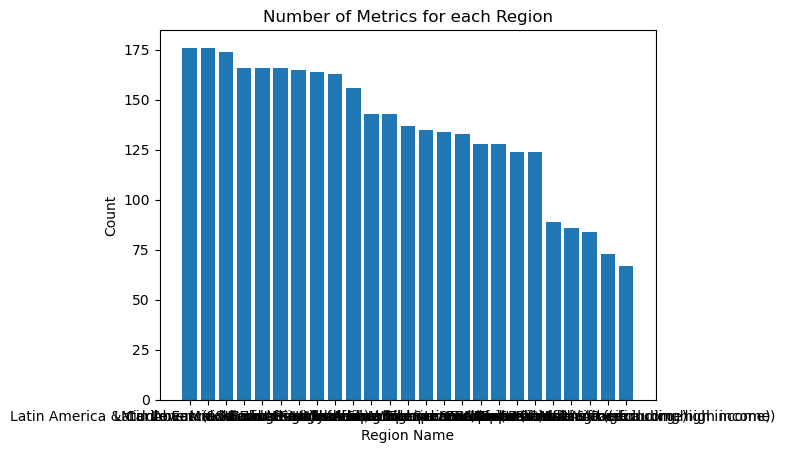

In [4]:
plt.bar(wb_df['Country Name'].value_counts().index, wb_df['Country Name'].value_counts())
plt.title('Number of Metrics for each Region')
plt.xlabel('Region Name')
plt.ylabel('Count');

It is impossible to read any of the labels on the x-axis of the above bar chart as they all overlap. This is an example of **overplotting**, which is defined as data/labels on a plot overlapping, making it difficult to see what's going to. To fix this, we could rotate the x-axis labels so they're vertical, as done below.

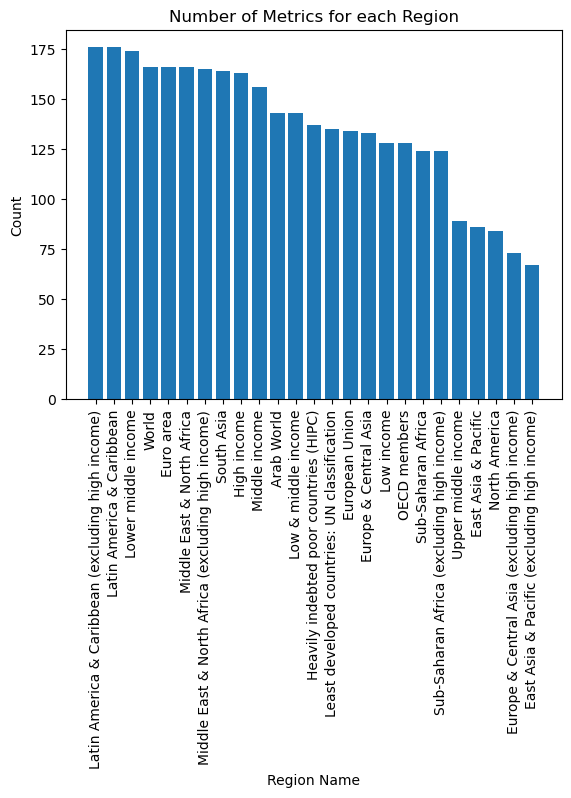

In [5]:
plt.bar(wb_df['Country Name'].value_counts().index, wb_df['Country Name'].value_counts())
plt.xticks(rotation=90)
plt.title('Number of Metrics for each Region')
plt.xlabel('Region Name')
plt.ylabel('Count');

Alternatively, you can easily make this plot in `seaborn` using the [`.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) command. As you can see, `seaborn` automatically gave the plot a color scheme and x and y-axis labels (`matplotlib` would not do this without us specifying the labels). However, we still have to use `plt.xticks()` to avoid overplotting. 

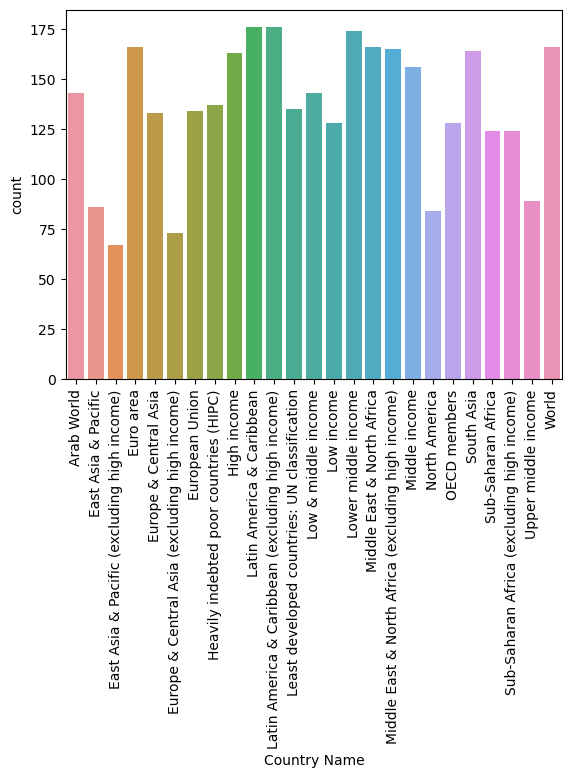

In [6]:
sns.countplot(data = wb_df, x = 'Country Name');
plt.xticks(rotation=90);

Another way to avoid overplotting would be to make a horizontal bar chart instead. We have done so using `seaborn` below.

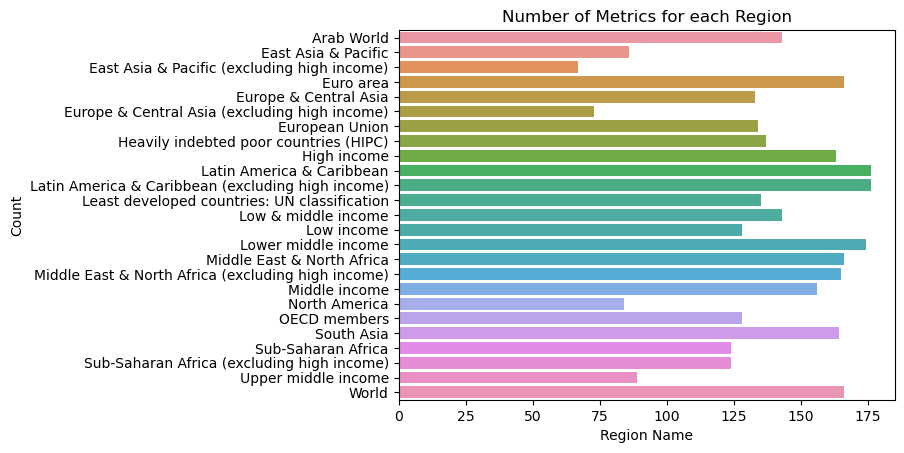

In [7]:
sns.countplot(data = wb_df, y = 'Country Name')
plt.title('Number of Metrics for each Region')
plt.xlabel('Region Name')
plt.ylabel('Count');

Finally, if you would like to also sort these values from highest to lowest (similar to how the `.value_counts()` command sorted the `matplotlib` bar chart in descending order), you can use the `order` parameter.

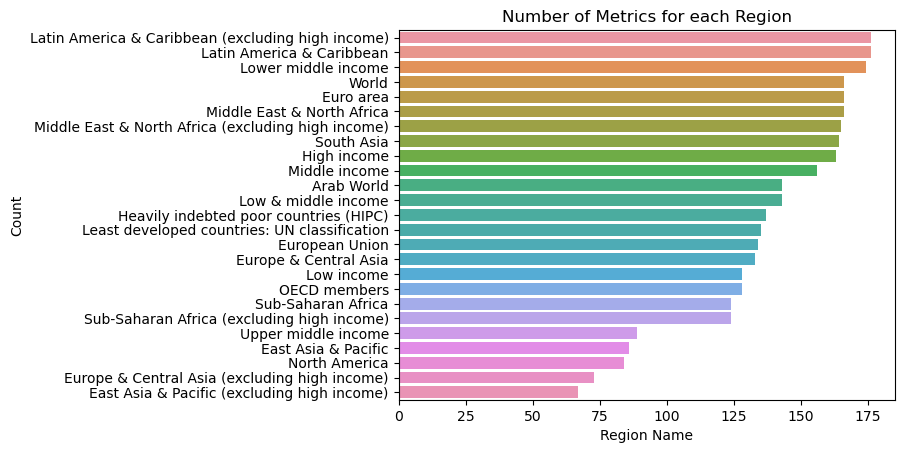

In [8]:
sns.countplot(data = wb_df, y = 'Country Name', order = wb_df['Country Name'].value_counts().index)
plt.title('Number of Metrics for each Region')
plt.xlabel('Region Name')
plt.ylabel('Count');

## Scatter Plots

Scatter plots are used to visualize the relationship between two numerical variables. They help us infer the association between two variables. The association between two variables refers to how one variable changes with respect to the other.  We can describe the association between two variables based on two factors:

1. *Magnitude:* Is the association strong or weak? If the points on the scatter plot all line up along a straight line (in any direction), it means that the association between the variables is strong. On the other hand, if the points are all spread out and scattered (no pun intended), it means that the association is weak.

2. *Direction (or sign):* Is the association positive or negative? If one variable increases as the other variable increases, the association between the two variables is positive. If one decreases as the other increases, the association is negative. 

For example, let us say we're interested in plotting the percent of males vs females enrolled in primary school each year across the entire world, using data from 1970 to 2014. We have done this using `matplotlib` below. As you can see, while it's easy to extract columns as series, in order to plot row-wise data, we must extract individual rows and then turn them into `NumPy` arrays.

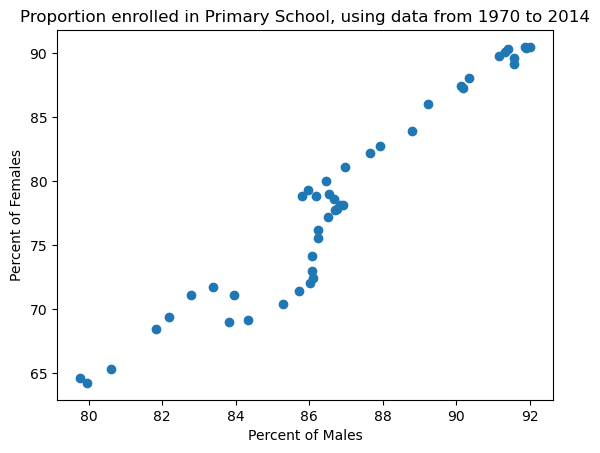

In [9]:
males = np.array(wb_df[(wb_df['Indicator Name'] == 'Adjusted net enrolment rate, primary, male (%)')  
     & (wb_df['Country Name'] == 'World')].iloc[:,4:])[0]
females = np.array(wb_df[(wb_df['Indicator Name'] == 'Adjusted net enrolment rate, primary, female (%)')  
     & (wb_df['Country Name'] == 'World')].iloc[:,4:])[0]
plt.scatter(x = males, y = females);
plt.title('Proportion enrolled in Primary School, using data from 1970 to 2014')
plt.xlabel('Percent of Males')
plt.ylabel('Percent of Females');

We could've also made this plot with `seaborn`.

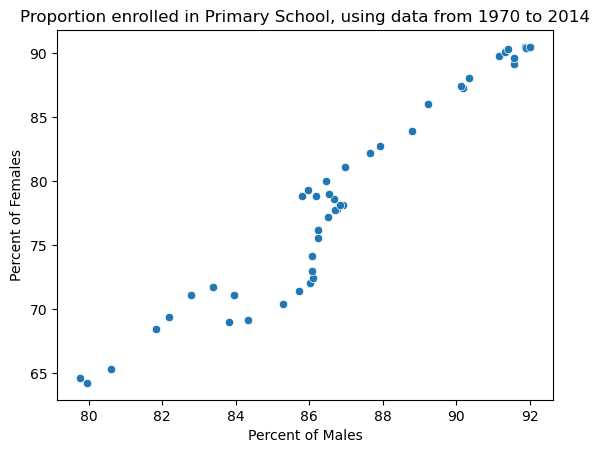

In [10]:
males = np.array(wb_df[(wb_df['Indicator Name'] == 'Adjusted net enrolment rate, primary, male (%)')  
     & (wb_df['Country Name'] == 'World')].iloc[:,4:])[0]
females = np.array(wb_df[(wb_df['Indicator Name'] == 'Adjusted net enrolment rate, primary, female (%)')  
     & (wb_df['Country Name'] == 'World')].iloc[:,4:])[0]
sns.scatterplot(x = males, y = females);
plt.title('Proportion enrolled in Primary School, using data from 1970 to 2014')
plt.xlabel('Percent of Males')
plt.ylabel('Percent of Females');

Finally, to add some context to our visualization, let us also plot a `y = x` line, to represent where the data should be if there was gender quality in primary school enrollment. Notice how we have also added a legend here.

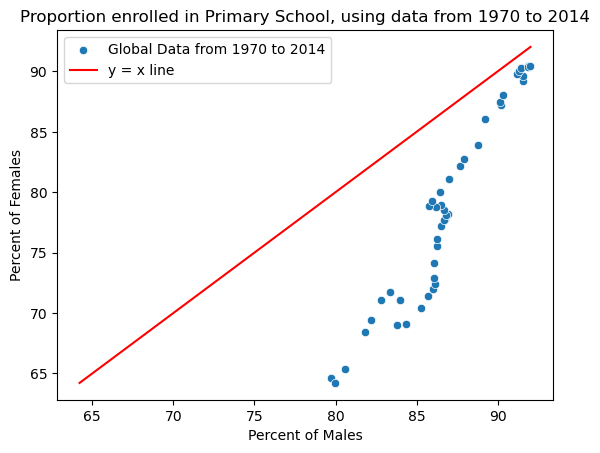

In [11]:
males = np.array(wb_df[(wb_df['Indicator Name'] == 'Adjusted net enrolment rate, primary, male (%)')  
     & (wb_df['Country Name'] == 'World')].iloc[:,4:])[0]
females = np.array(wb_df[(wb_df['Indicator Name'] == 'Adjusted net enrolment rate, primary, female (%)')  
     & (wb_df['Country Name'] == 'World')].iloc[:,4:])[0]
sns.scatterplot(x = males, y = females, label = 'Global Data from 1970 to 2014');
plt.title('Proportion enrolled in Primary School, using data from 1970 to 2014')
plt.xlabel('Percent of Males')
plt.ylabel('Percent of Females');
min_val = min(np.min(males), np.min(females))
max_val = max(np.max(males), np.max(females))
plt.plot([min_val, max_val], [min_val, max_val], color = 'red', label = 'y = x line');
plt.legend();

Based on the scatter plots above, it appears that there is a positive association between the percent of males and the percent of females enrolled in primary school. As the association roughly follows a straight-ish line, we can say that the association appears to be strong.

As a bonus, we can use the more advanced [Plotly](https://plotly.com/) library to make Python plots where you can hover over data points to get more information on the general trend. This has been done below as an example, and you are always encouraged to read [Plotly's documentation](https://plotly.com/python/) for more information.

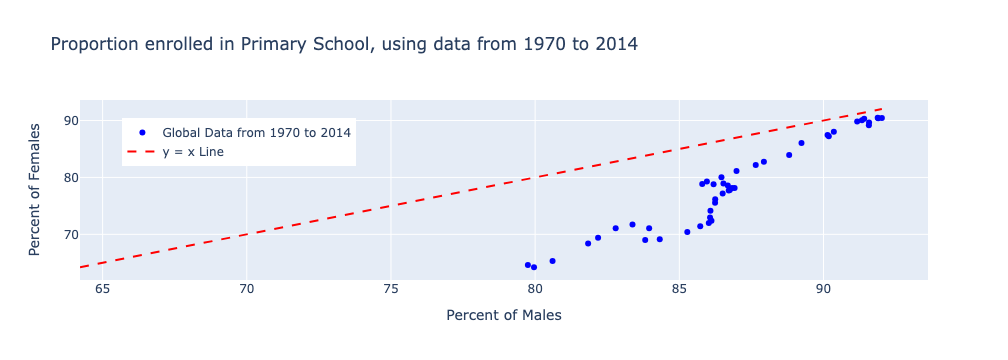

In [12]:
males = np.array(wb_df[(wb_df['Indicator Name'] == 'Adjusted net enrolment rate, primary, male (%)')  
     & (wb_df['Country Name'] == 'World')].iloc[:, 4:])[0]
females = np.array(wb_df[(wb_df['Indicator Name'] == 'Adjusted net enrolment rate, primary, female (%)')  
     & (wb_df['Country Name'] == 'World')].iloc[:, 4:])[0]

# Create a Figure
fig = go.Figure()

# Add a trace for with the scatter plot data points
fig.add_trace(go.Scatter(
    x=males,
    y=females,
    mode='markers',
    marker=dict(color='blue'),
    text=[str(year) for year in wb_df.iloc[:, 4:].columns], # hover text includes years
    hoverinfo='text',
    name = 'Global Data from 1970 to 2014'
))

# Add y = x line
fig.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='y = x Line'
))

# Set title/axis labels
fig.update_layout(
    title='Proportion enrolled in Primary School, using data from 1970 to 2014',
    xaxis=dict(title='Percent of Males'),
    yaxis=dict(title='Percent of Females'),
    legend=dict(x=0.05, y=0.9)
)

fig # Show the plot


With the help of these hover points, we can see that we have trended closer to gender equality in primary school enrollment over time. Great news!

## Line Plots

A line plot is used to display data as a series of points connected by a line. It's generally used to visualize how a variable changes over time (also known as [time series data](https://www.investopedia.com/terms/t/timeseries.asp)), often with a time-related variable on the x-axis (minutes, days, months, years, etc.) and a numerical variable on the y-axis.

For example, let's create a line plot to see how the total enrollment rate in primary school (across both sexes) changed from 1970 to 2014. We've done this below with `matplotlib`.

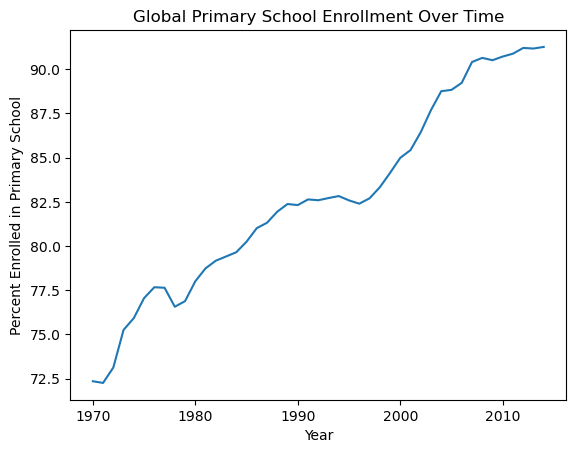

In [13]:
enrollment = np.array(wb_df[(wb_df['Indicator Name'] == 'Adjusted net enrolment rate, primary, both sexes (%)')  
     & (wb_df['Country Name'] == 'World')].iloc[:, 4:])[0]
years = np.arange(1970,2015)
plt.plot(years, enrollment)
plt.title('Global Primary School Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Percent Enrolled in Primary School');

We can also do this with `seaborn`.

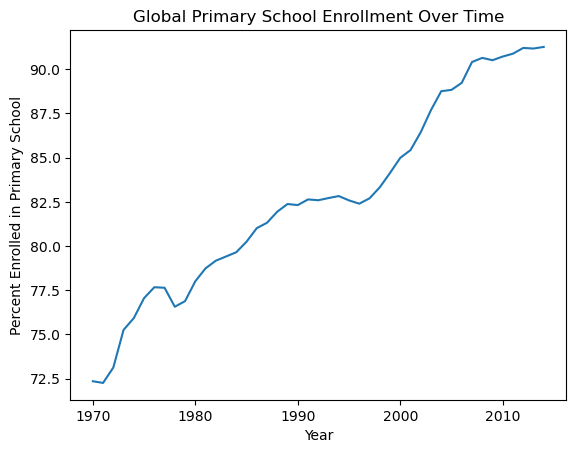

In [14]:
enrollment = np.array(wb_df[(wb_df['Indicator Name'] == 'Adjusted net enrolment rate, primary, both sexes (%)')  
     & (wb_df['Country Name'] == 'World')].iloc[:, 4:])[0]
years = np.arange(1970,2015)
sns.lineplot(x = years, y = enrollment)
plt.title('Global Primary School Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Percent Enrolled in Primary School');

It appears that more people are being enrolled in primary school over time, great news!

## Histograms, Box Plots and Violin Plots

Histograms, box plots and violin plots are all ways to visualize the distribution of a single quantitative variable. They help you understand the spread of values in the data. To help explain these, we will import in another dataset on education from the World Bank. We have obtained this dataset from [Data 100's Course Notes Visualization I](https://ds100.org/fa23-course-notes/visualization_1/visualization_1.html).


In [15]:
wb_df_2 = pd.read_csv('data/world_bank.csv').drop(columns={'Unnamed: 0'})
wb_df_2

Continent   Country  \
0        Africa   Algeria   
1        Africa    Angola   
2        Africa     Benin   
3        Africa  Botswana   
4        Africa   Burundi   
..          ...       ...   
161  S. America    Guyana   
162  S. America  Paraguay   
163  S. America      Peru   
164  S. America  Suriname   
165  S. America   Uruguay   

     Primary completion rate: Male: % of relevant age group: 2015  \
0                                                106.0              
1                                                  NaN              
2                                                 83.0              
3                                                 98.0              
4                                                 58.0              
..                                                 ...              
161                                               87.0              
162                                               89.0              
163                                               99.0              
164                                               90.0              
165                                              103.0              

     Primary completion rate: Female: % of relevant age group: 2015  \
0                                                105.0                
1                                                  NaN                
2                                                 73.0                
3                                                101.0                
4                                                 66.0                
..                                                 ...                
161                                               81.0                
162                                               90.0                
163                                              100.0                
164                                               99.0                
165                                              104.0                

     Lower secondary completion rate: Male: % of relevant age group: 2015  \
0                                                 68.0                      
1                                                  NaN                      
2                                                 50.0                      
3                                                 86.0                      
4                                                 35.0                      
..                                                 ...                      
161                                                NaN                      
162                                               71.0                      
163                                               84.0                      
164                                               36.0                      
165                                               54.0                      

     Lower secondary completion rate: Female: % of relevant age group: 2015  \
0                                                 85.0                        
1                                                  NaN                        
2                                                 37.0                        
3                                                 87.0                        
4                                                 30.0                        
..                                                 ...                        
161                                                NaN                        
162                                               77.0                        
163                                               87.0                        
164                                               65.0                        
165                                               68.0                        

     Youth literacy rate: Male: % of ages 15-24: 2005-14  \
0                                        

### Histograms

Histograms look quite similar to bar charts, but have a few differences. Histograms follow the *area principle* and have two defining properties:

1. As the values on the horizontal axis are numerical and therefore have fixed positions on the number line, the bins are drawn to scale and are contiguous (though some might be empty).
1. The area of each bar is proportional to the number of entries (or percent of data values) in the corresponding bin. The histogram is said to be drawn on a *density scale*.

For example, let us visualize the percent of females who completed their primary education across various countries in 2015 using a histogram.

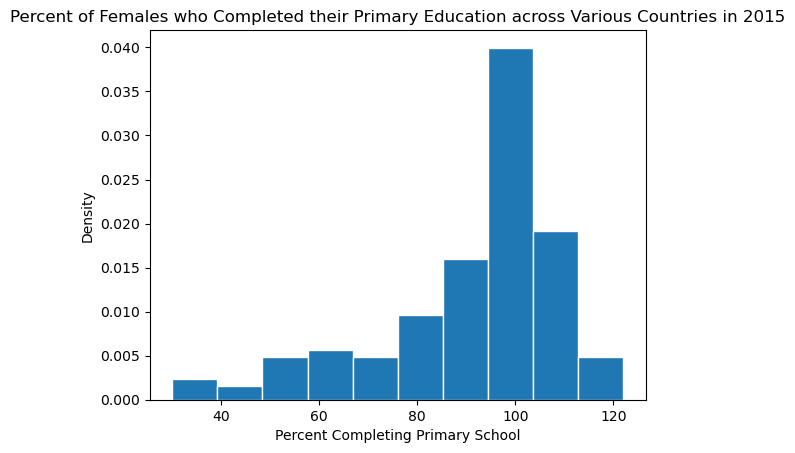

In [16]:
plt.hist(wb_df_2['Primary completion rate: Female: % of relevant age group: 2015'],
         density=True, edgecolor="white"); 
# If you don't specify density = True, it'll plot the counts on the y-axis instead
plt.title('Percent of Females who Completed their Primary Education across Various Countries in 2015')
plt.xlabel('Percent Completing Primary School')
plt.ylabel('Density');

### Box Plots and Violin Plots

A boxplot is similar to a histogram as it also visualizes the distribution of a numerical variable, but it gives you more specific statistics about the distribution: the minimum, lower quartile (value at the bottom 25th percentile), median (value at the 50th percentile), upper quartile (value at the top 25th percentile) and maximum. These values are all denoted by horizontal lines, and the interquartile range (area between the 25th and 75th percentiles) is shaded.

Let us visualize the same data as above, but with a boxplot instead.

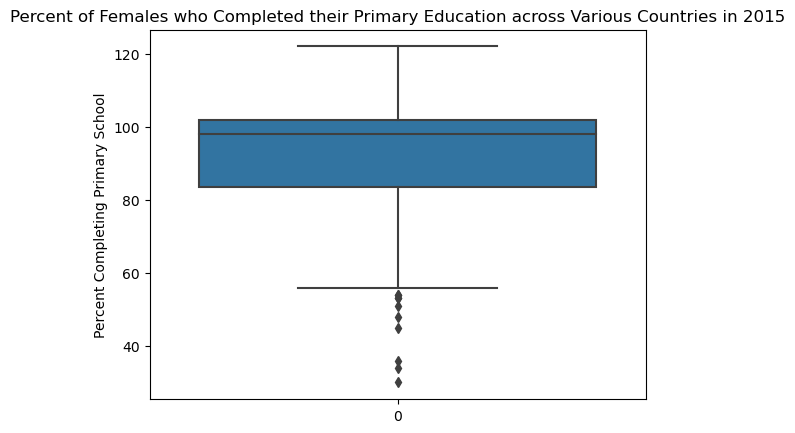

In [17]:
sns.boxplot(data = wb_df_2['Primary completion rate: Female: % of relevant age group: 2015']);
plt.title('Percent of Females who Completed their Primary Education across Various Countries in 2015')
plt.ylabel('Percent Completing Primary School');

Both the whiskers always have the same length (to be precise, the length is 1.5 times the inter quartile range). The existence of dots beyond the whiskers indicate outliers in the data.

A violin plot is very similar to a box plot. However, while a box plot uses horizontal lines to indicate the quartiles, a violin plot uses a vertical line in the center. Additionally, while the width of the box at any point does not encode meaning in a box plot, in a violin plot, the width of the plot indicates the density of the distribution at each possible value.

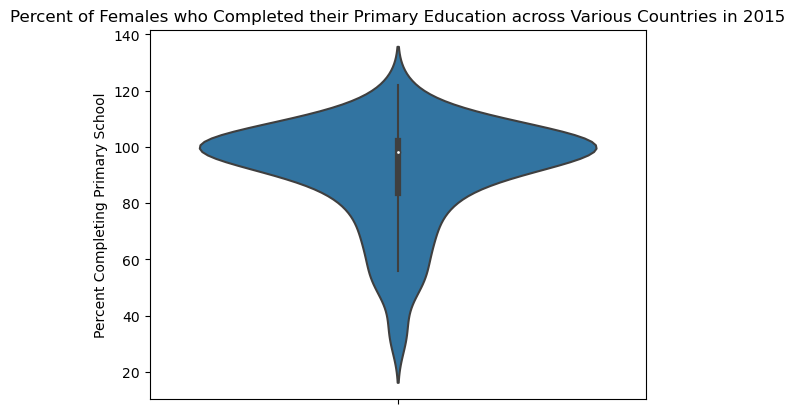

In [18]:
sns.violinplot(data=wb_df_2, y="Primary completion rate: Female: % of relevant age group: 2015");
plt.title('Percent of Females who Completed their Primary Education across Various Countries in 2015')
plt.ylabel('Percent Completing Primary School');

### Overlaid Histograms and Side-by-Side Box and Violin Plots.

To compare a quantitative distribution across the different categories of a qualitative categorical variable, we can overlay histograms or plot side-by-side box and violin plots. Examples of all of those have been done below to visualize the difference in primary school completion rate for females vs males.

#### Overlaid Histograms

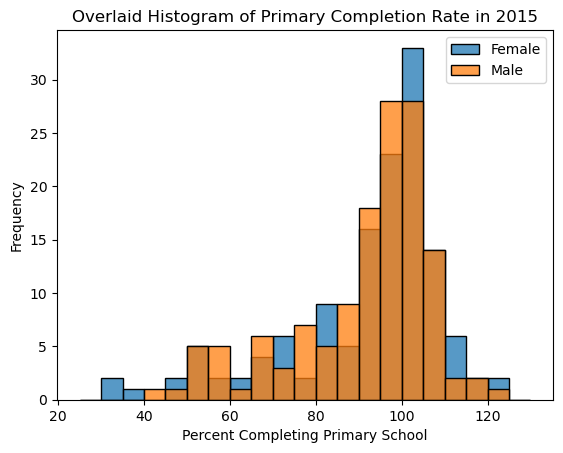

In [19]:
data_female = wb_df_2['Primary completion rate: Female: % of relevant age group: 2015']
data_male = wb_df_2['Primary completion rate: Male: % of relevant age group: 2015']
bins = np.arange(25,131,5) # Using the same bins for both histograms

sns.histplot(data_female.dropna(), bins = bins, label='Female', edgecolor='black')
sns.histplot(data_male.dropna(), bins = bins, label='Male', edgecolor='black')

plt.title('Overlaid Histogram of Primary Completion Rate in 2015')
plt.xlabel('Percent Completing Primary School')
plt.ylabel('Frequency')

plt.legend();

#### Side-by-Side Box Plots

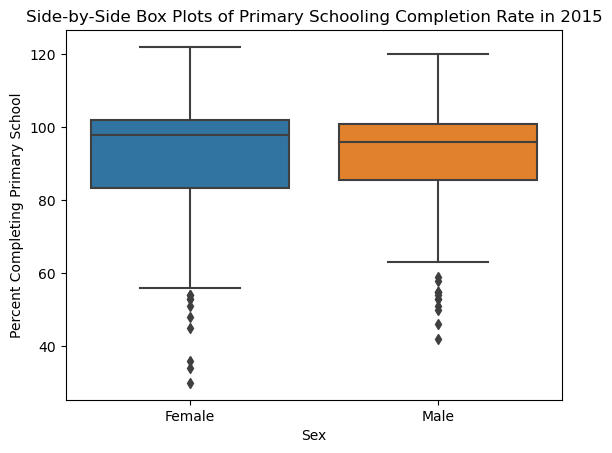

In [20]:
sns.boxplot(wb_df_2[['Primary completion rate: Female: % of relevant age group: 2015',
                    'Primary completion rate: Male: % of relevant age group: 2015']])
plt.title('Side-by-Side Box Plots of Primary Schooling Completion Rate in 2015')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Female', 'Male']) # Manually setting the x-axis labels to avoid overplotting
plt.ylabel('Percent Completing Primary School');


#### Side-by-Side Violin Plots

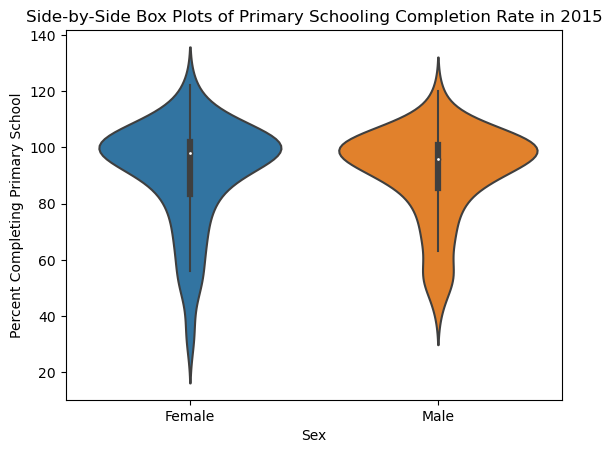

In [21]:
sns.violinplot(wb_df_2[['Primary completion rate: Female: % of relevant age group: 2015',
                    'Primary completion rate: Male: % of relevant age group: 2015']])
plt.title('Side-by-Side Box Plots of Primary Schooling Completion Rate in 2015')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Female', 'Male']) # Manually setting the x-axis labels to avoid overplotting
plt.ylabel('Percent Completing Primary School');
